In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("titanic.csv",index_col =0)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df.drop("alive",axis =1,inplace = True)

In [9]:
column_to_drop = ['deck','alone']
df.drop(columns=column_to_drop,axis =1,inplace = True)


In [11]:
df.drop(['fare'] ,axis=1,inplace=True)

In [13]:
df.drop(columns=['who','adult_male','class'],inplace = True)

<Axes: >

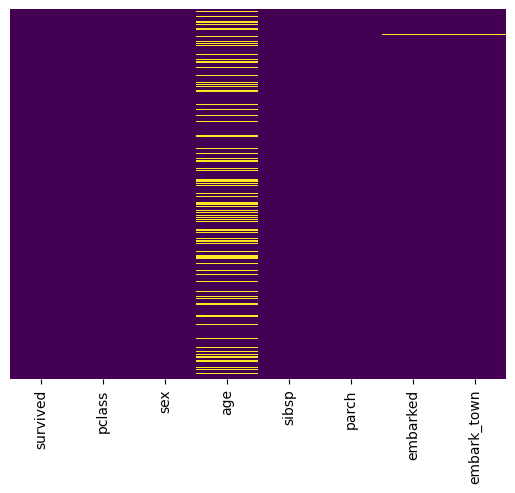

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='survived', ylabel='count'>

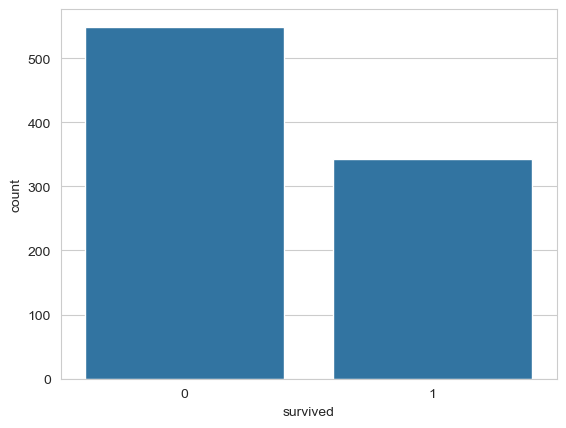

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df)

<Axes: xlabel='survived', ylabel='count'>

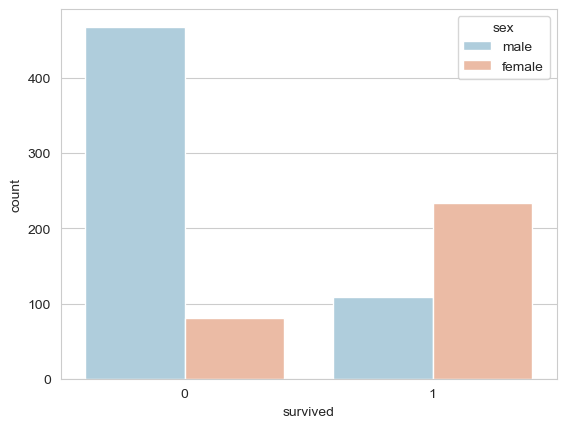

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

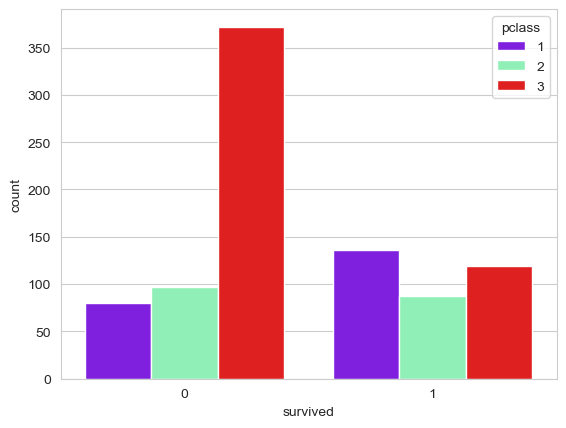

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

<Axes: xlabel='age', ylabel='Count'>

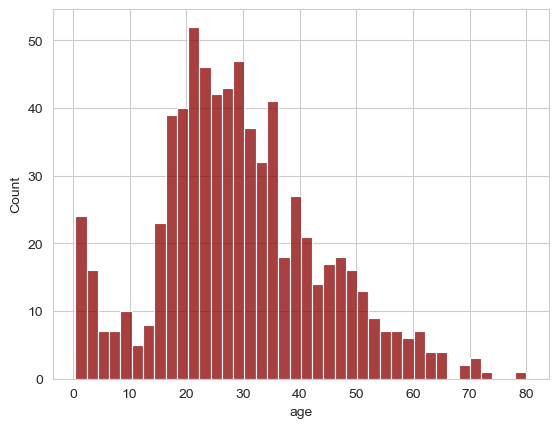

In [24]:
sns.histplot(df['age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

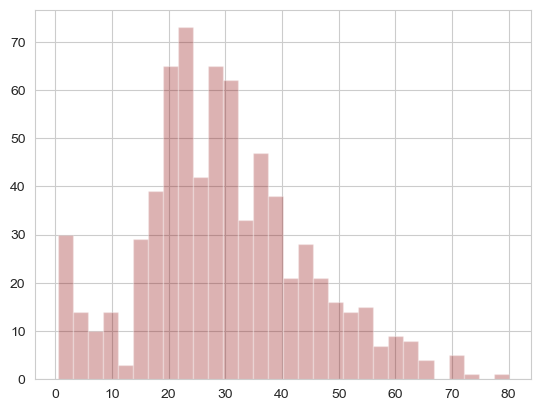

In [25]:
df['age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='sibsp', ylabel='count'>

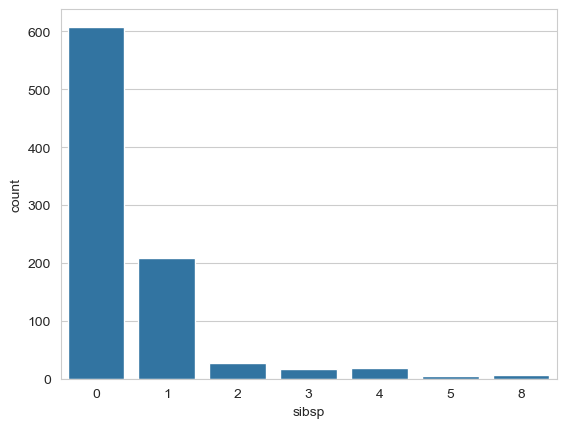

In [27]:
sns.countplot(x='sibsp',data=df)

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [30]:
# import cufflinks as cf
# cf.go_offline()

In [33]:
# train['Fare'].iplot(kind='hist',bins=30,color='green')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='pclass', ylabel='age'>

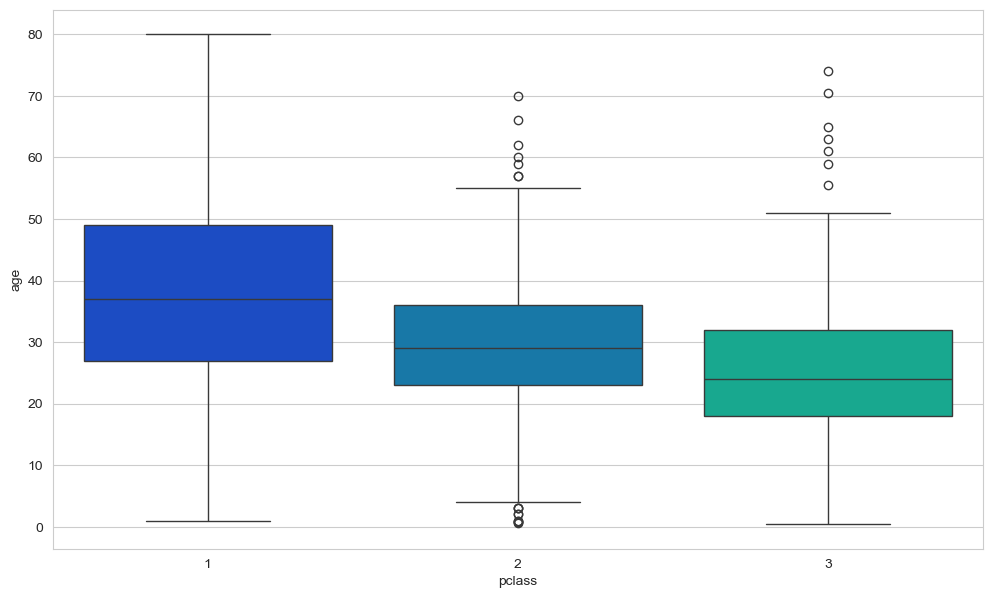

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [39]:
# df.isnull().sum()

In [41]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 37

        elif pclass == 2:
            return 29

        else:
            return 24

    else:
        return age

In [43]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

<Axes: >

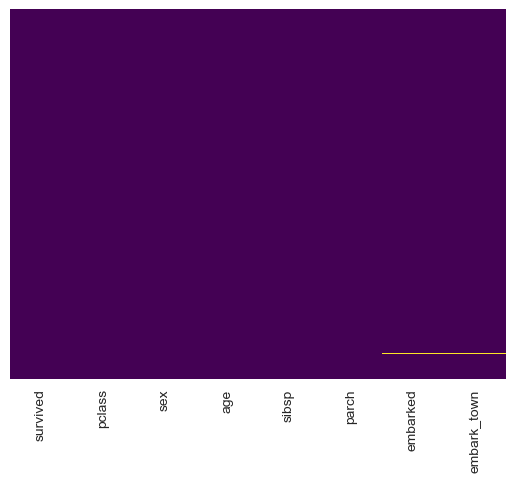

In [45]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,embark_town
0,0,3,male,22.0,1,0,S,Southampton
1,1,1,female,38.0,1,0,C,Cherbourg
2,1,3,female,26.0,0,0,S,Southampton
3,1,1,female,35.0,1,0,S,Southampton
4,0,3,male,35.0,0,0,S,Southampton


### Label Encoding for Sex col.

In [50]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [54]:
df['sex'] = le.fit_transform(df['sex'])

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked,embark_town
0,0,3,1,22.0,1,0,S,Southampton
1,1,1,0,38.0,1,0,C,Cherbourg
2,1,3,0,26.0,0,0,S,Southampton
3,1,1,0,35.0,1,0,S,Southampton
4,0,3,1,35.0,0,0,S,Southampton


In [58]:
df["sex"].value_counts()

sex
1    577
0    314
Name: count, dtype: int64

In [60]:
# Embark Label Encoding

In [62]:
df['embark'] = le.fit_transform(df['embarked'])

In [64]:
df = df.dropna(subset=['embarked'])

In [66]:
df['embark'].value_counts()
# S =2
# C =0

embark
2    644
0    168
1     77
Name: count, dtype: int64

In [68]:
df.drop(['embarked','embark_town'],axis=1,inplace = True)

In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embark
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [72]:
df['survived'].value_counts()

survived
0    549
1    340
Name: count, dtype: int64

In [74]:
X= df.drop(["survived"],axis=1)

In [76]:
y=pd.DataFrame(df["survived"])

### Train_Test_Split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### SMOTE FOR IMBALANCE TRAIN DATA

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
smote = SMOTE(random_state=42)

X_resampled , Y_resampled = smote.fit_resample(X_train,y_train)

In [84]:
X_resampled.head()

,pclass,sex,age,sibsp,parch,embark
0,1,0,35.0,1,0,2
1,3,0,24.0,0,0,2
2,3,1,21.0,0,0,2
3,2,1,36.0,1,2,2
4,2,1,29.0,1,0,0


### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
RF = RandomForestClassifier(max_depth=2)

In [93]:
RF.fit(X_resampled,Y_resampled)

RandomForestClassifier(max_depth=2)

In [95]:
y_train_pred = RF.predict(X_resampled) 

In [97]:
from sklearn.metrics import accuracy_score

In [99]:
acc_train = accuracy_score(y_train_pred,Y_resampled)
acc_train

0.8272251308900523

In [101]:
y_test_pred = RF.predict(X_test)

In [103]:
acc_test = accuracy_score(y_test,y_test_pred)
acc_test

0.8127340823970037

### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
clf=  DecisionTreeClassifier(max_depth=2)

In [110]:
clf.fit(X_resampled,Y_resampled)

DecisionTreeClassifier(max_depth=2)

In [112]:
y_train_pred = clf.predict(X_resampled)

In [114]:
acc_train = accuracy_score(y_train_pred,Y_resampled)

In [116]:
acc_train

0.806282722513089

In [118]:
y_test_pred = clf.predict(X_test)

In [120]:
acc_test = accuracy_score(y_test_pred,y_test)

In [122]:
acc_test

0.8014981273408239

In [124]:
X_resampled.head()

,pclass,sex,age,sibsp,parch,embark
0,1,0,35.0,1,0,2
1,3,0,24.0,0,0,2
2,3,1,21.0,0,0,2
3,2,1,36.0,1,2,2
4,2,1,29.0,1,0,0


In [126]:
Y_resampled.head()

,survived
0,1
1,0
2,0
3,0
4,0


In [128]:
X_resampled['pclass'].value_counts()

pclass
3    376
1    212
2    176
Name: count, dtype: int64

In [130]:
import pickle
file = open('titanic_model.pkl','wb')
pickle.dump(RF,file)
file.close()

In [132]:
X_test.head()


,pclass,sex,age,sibsp,parch,embark
281,3,1,28.0,0,0,2
435,1,0,14.0,1,2,2
39,3,0,14.0,1,0,0
418,2,1,30.0,0,0,2
585,1,0,18.0,0,2,2


In [134]:
y_test.head()

,survived
281,0
435,1
39,1
418,0
585,1
